In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
train = pd.read_csv('C:/Users/FINSUS-Admin/Documents/gblasd/DDRUCNN/data/train.csv', delimiter=',', header='infer', encoding='utf-8')
test = pd.read_csv('C:/Users/FINSUS-Admin/Documents/gblasd/DDRUCNN/data/test.csv', delimiter=',', header='infer', encoding='utf-8')

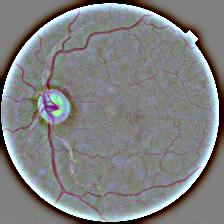

In [3]:
dir_img = 'C:/Users/FINSUS-Admin/Documents/gblasd/DDRUCNN/data/train/'
PIL.Image.open(str(dir_img + train['image'][0] + '.jpeg'))



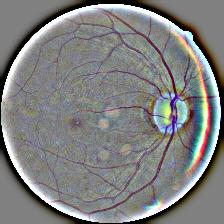

In [4]:
dir_img = 'C:/Users/FINSUS-Admin/Documents/gblasd/DDRUCNN/data/test/'
PIL.Image.open(str(dir_img + test['image'][0] + '.jpeg'))

In [21]:
batch_size = 10
img_height = 224
img_width = 224

In [23]:
from keras.preprocessing.image import ImageDataGenerator

train['level'] = train['level'].astype('str')
test['level'] = test['level'].astype('str')


datagen = ImageDataGenerator(rescale=1./255)
train_generator=datagen.flow_from_dataframe(dataframe=train, 
                                            directory="C:/Users/FINSUS-Admin/Documents/gblasd/DDRUCNN/data/train/", 
                                            x_col="path", 
                                            y_col="level", 
                                            class_mode="categorical", 
                                            target_size=(img_height,img_width), 
                                            batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)

valid_generator=validation_datagen.flow_from_dataframe(
    dataframe=test,
    directory='C:/Users/FINSUS-Admin/Documents/gblasd/DDRUCNN/data/resized_train_cropped/',
    x_col="path",
    y_col="level",
    class_mode="categorical", 
    batch_size=batch_size,   
    target_size=(img_height, img_width),
    seed=0)

Found 2832 validated image filenames belonging to 5 classes.
Found 708 validated image filenames belonging to 5 classes.


In [24]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers,models
from keras.applications.vgg16 import VGG16
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 128)     

In [26]:
from keras import optimizers

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(),metrics=['acc'])

In [ ]:
epochs=10
history=model.fit(train_generator,
                  steps_per_epoch=train_generator.n//batch_size,
                  epochs=30,
                  validation_data=valid_generator,
                  validation_steps=valid_generator.n//batch_size,
                  workers=4)

In [ ]:
loss, accuracy = model.evaluate(valid_generator, steps=valid_generator.n/batch_size, verbose=1)
print(loss, accuracy)

In [ ]:
loss, accuracy = model.evaluate(valid_generator, steps=valid_generator.n/batch_size=, verbose=1)
